In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from scipy import stats

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\UK_GDP\GDP_complete_7.csv")

In [3]:
df

,Year,Inflation,Exchange_Rate,Government_Expenditure,External_Balance,Unemployment,GDP_per_Capita,Industry
0,1991,7.461783,0.567015,19.397686,-0.124333,8.550,11283.71201,26.716143
1,1992,4.591549,0.569774,19.875590,-0.458552,9.770,11673.58991,26.327767
2,1993,2.558578,0.666757,19.185011,-0.084112,10.350,12261.79825,25.747901
3,1994,2.219013,0.653427,18.833033,0.269746,9.650,12878.01617,26.274018
4,1995,2.697495,0.633668,17.041598,0.565478,8.690,14682.16549,24.362531
5,1996,2.851782,0.640958,16.601227,0.478575,8.190,15644.50259,24.490518
6,1997,2.201143,0.610836,16.042710,0.564608,7.070,16348.67624,23.628154
7,1998,1.820562,0.603824,16.039744,-0.477215,6.200,17072.14582,22.976141
8,1999,1.752951,0.618057,16.453039,-1.020754,6.040,17777.84867,22.573060
9,2000,1.182956,0.660931,16.640896,-1.202087,5.560,18690.86451,22.623079


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    32 non-null     int64  
 1   Inflation               32 non-null     float64
 2   Exchange_Rate           32 non-null     float64
 3   Government_Expenditure  32 non-null     float64
 4   External_Balance        32 non-null     float64
 5   Unemployment            32 non-null     float64
 6   GDP_per_Capita          32 non-null     float64
 7   Industry                32 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 2.1 KB


In [5]:
# Descriptive Statistics
desc_stats = df.describe()
print(desc_stats)

              Year  Inflation  Exchange_Rate  Government_Expenditure  \
count    32.000000  32.000000      32.000000               32.000000   
mean   2006.500000   2.488494       0.646881               19.227719   
std       9.380832   1.606939       0.078688                1.778968   
min    1991.000000   0.368047       0.499772               16.039744   
25%    1998.750000   1.529363       0.606753               18.440655   
50%    2006.500000   2.255340       0.640309               19.398859   
75%    2014.250000   2.562242       0.674081               20.191817   
max    2022.000000   7.922049       0.811302               22.602324   

       External_Balance  Unemployment  GDP_per_Capita   Industry  
count         32.000000     32.000000       32.000000  32.000000  
mean          -1.104501      6.258688    23422.301156  20.637315  
std            0.957227      1.893851     7240.372380   3.072187  
min           -2.666539      3.730000    11283.712010  16.612429  
25%           -1

In [6]:
# Check for missing values
print(df.isnull().sum())

Year                      0
Inflation                 0
Exchange_Rate             0
Government_Expenditure    0
External_Balance          0
Unemployment              0
GDP_per_Capita            0
Industry                  0
dtype: int64


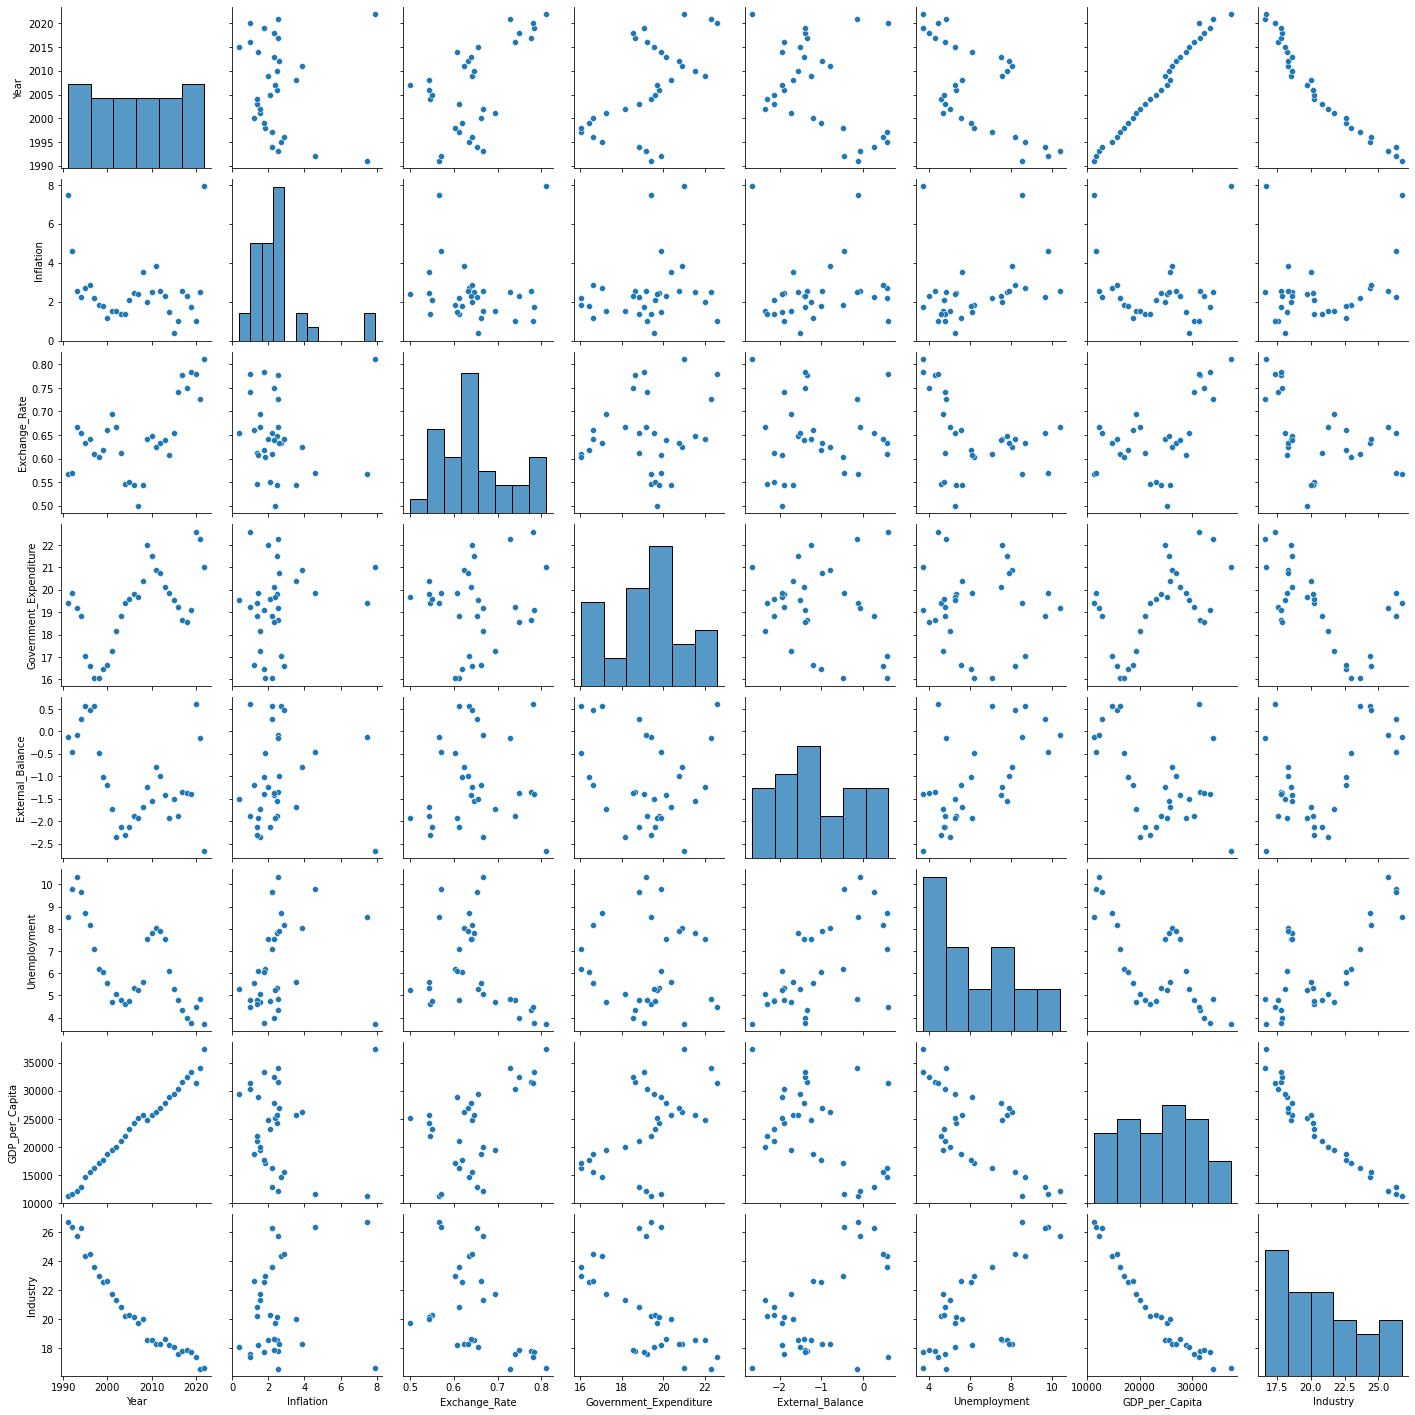

In [8]:
# Pairplot to see relationships between variables
sns.pairplot(df)
plt.show()

**Interpretation of the Pair Plot:**

1. **Diagonal (Histograms):**

    The diagonal plots show the distribution of each variable. This helps in understanding the spread, skewness, and central tendency of each variable.
    
    Inflation: The histogram shows that inflation rates are mostly concentrated below 4%, with a few higher values. There's a notable peak in the early 1990s and around 2021-2022.
    
    Exchange Rate: The exchange rate histogram indicates a relatively wide distribution with most values between 0.5 and 0.8.
    
    Government Expenditure: The distribution is relatively narrow, with values clustering around 18-22% of GDP.
    
    External Balance: Mostly negative values 
with a few instances of positive balance, indicating frequent trade deficits.

    Unemployment: The histogram shows a general decline over the years, with a concentration of values around 4-10%.
    
    GDP per Capita: Displays a clear upward trend, with values increasing significantly over time.
    
    
    
2. **Off-diagonal (Scatter Plots):**

These plots show the relationships between pairs of variables. We look for patterns such as linearity, clusters, or outliers.

3. **Key Relationships:**

    Inflation vs. Exchange Rate:
The scatter plot shows a positive correlation where higher inflation tends to coincide with higher exchange rates. This suggests that periods of higher inflation might be associated with a weaker currency.

    Inflation vs. Unemployment:
The scatter plot indicates a slight positive correlation, suggesting that higher inflation might be associated with higher unemployment, which aligns with the Phillips curve in some periods.

    Government Expenditure vs. GDP per Capita:
A strong positive linear relationship is evident, indicating that increased government spending is associated with higher GDP per Capita.

    Unemployment vs. GDP per Capita:
Displays a strong negative correlation, indicating that higher unemployment rates are associated with lower GDP per Capita.

    Unemployment vs. Government Expenditure:
The scatter plot shows a moderate negative correlation, suggesting that higher government expenditure might be associated with lower unemployment rates.

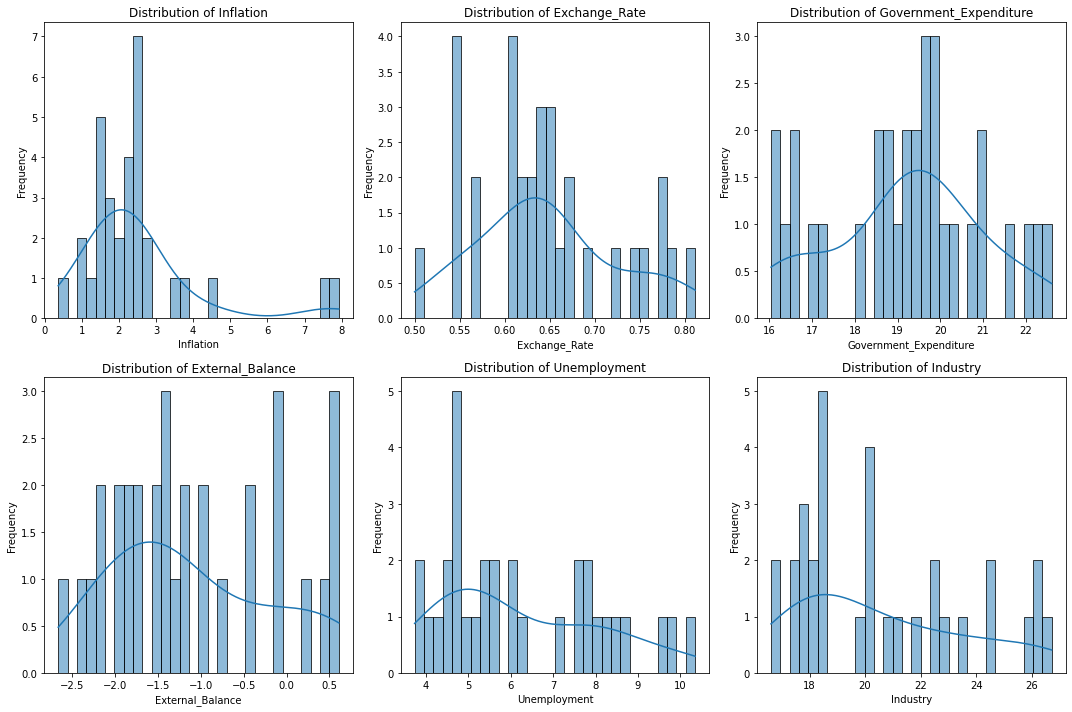

In [9]:
# Assuming the DataFrame 'df' has already been defined and loaded with the necessary data
# Example structure of df: ['Inflation', 'Exchange_Rate', 'Government_Expenditure', 'External_Balance', 'Unemployment', 'Industry', 'GDP_per_Capita']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# List of economic indicators to plot
indicators = ['Inflation', 'Exchange_Rate', 'Government_Expenditure', 'External_Balance', 'Unemployment', 'Industry']

# Number of indicators
num_indicators = len(indicators)

# Create subplots for each indicator
for i, indicator in enumerate(indicators, 1):
    plt.subplot(2, (num_indicators + 1) // 2, i)  # Adjust the grid size as needed
    sns.histplot(df[indicator], kde=True, bins=30)
    plt.title(f'Distribution of {indicator}')
    plt.xlabel(indicator)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# Correlation Matrix
corr_matrix = df.corr()
print(corr_matrix)

                            Year  Inflation  Exchange_Rate  \
Year                    1.000000  -0.113227       0.578052   
Inflation              -0.113227   1.000000      -0.012338   
Exchange_Rate           0.578052  -0.012338       1.000000   
Government_Expenditure  0.588778   0.200956       0.136719   
External_Balance       -0.402428   0.061209       0.060903   
Unemployment           -0.653465   0.249213      -0.360008   
GDP_per_Capita          0.993480  -0.076993       0.546849   
Industry               -0.965355   0.203818      -0.434918   

                        Government_Expenditure  External_Balance  \
Year                                  0.588778         -0.402428   
Inflation                             0.200956          0.061209   
Exchange_Rate                         0.136719          0.060903   
Government_Expenditure                1.000000         -0.181716   
External_Balance                     -0.181716          1.000000   
Unemployment                     

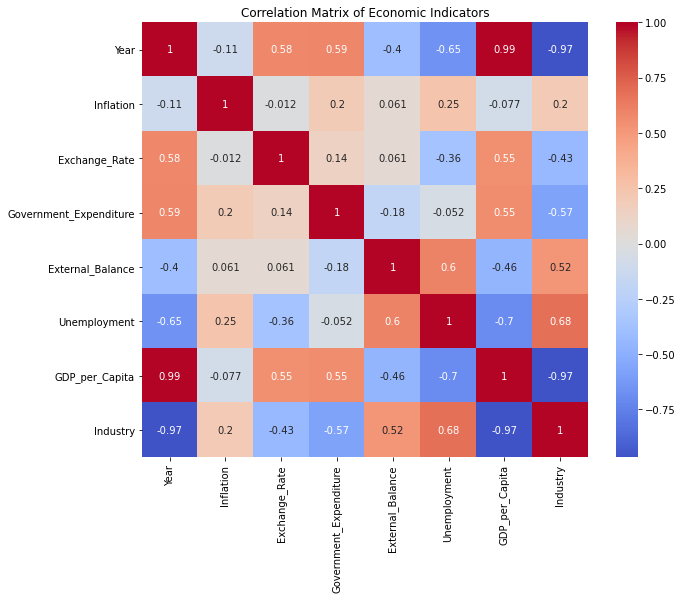

In [11]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Economic Indicators')

# Save the heatmap to a file
plt.savefig('correlation_matrix_heatmap.png')

plt.show()

**The correlation matrix shows the Pearson correlation coefficients between each pair of variables. Key points to note:**

**Positive values indicate a direct relationship, while negative values indicate an inverse relationship.
High absolute values (close to 1 or -1) indicate strong correlations.**

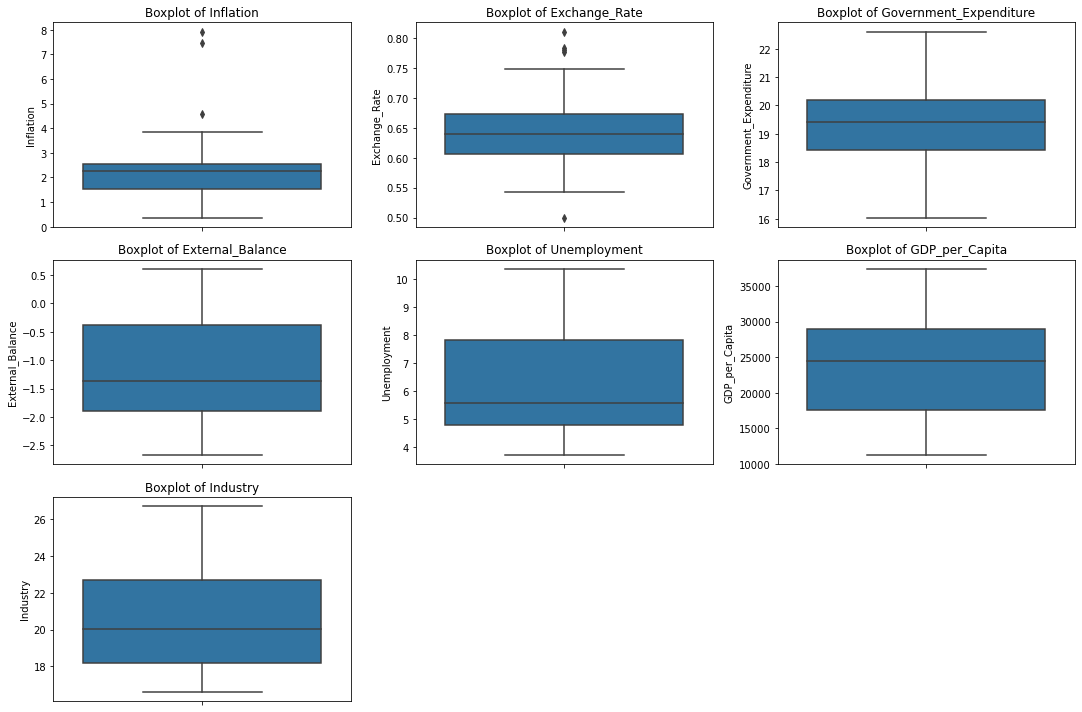

In [12]:
# Boxplots to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
 
       
plt.tight_layout()
plt.show()

**Inflation:**

    The boxplot  shows the median, quartiles, and potential outliers in the inflation rates over the years.
    The points that fall outside the whiskers, represents potential outliers.
    High variability in inflation could indicate periods of economic instability.

**Exchange Rate:**

    This plot shows the distribution of exchange rates.
    The points that fall outside the whiskers, represents potential outliers.
    Outliers in the exchange rate might suggest significant fluctuations in currency value, possibly due to economic or political events.

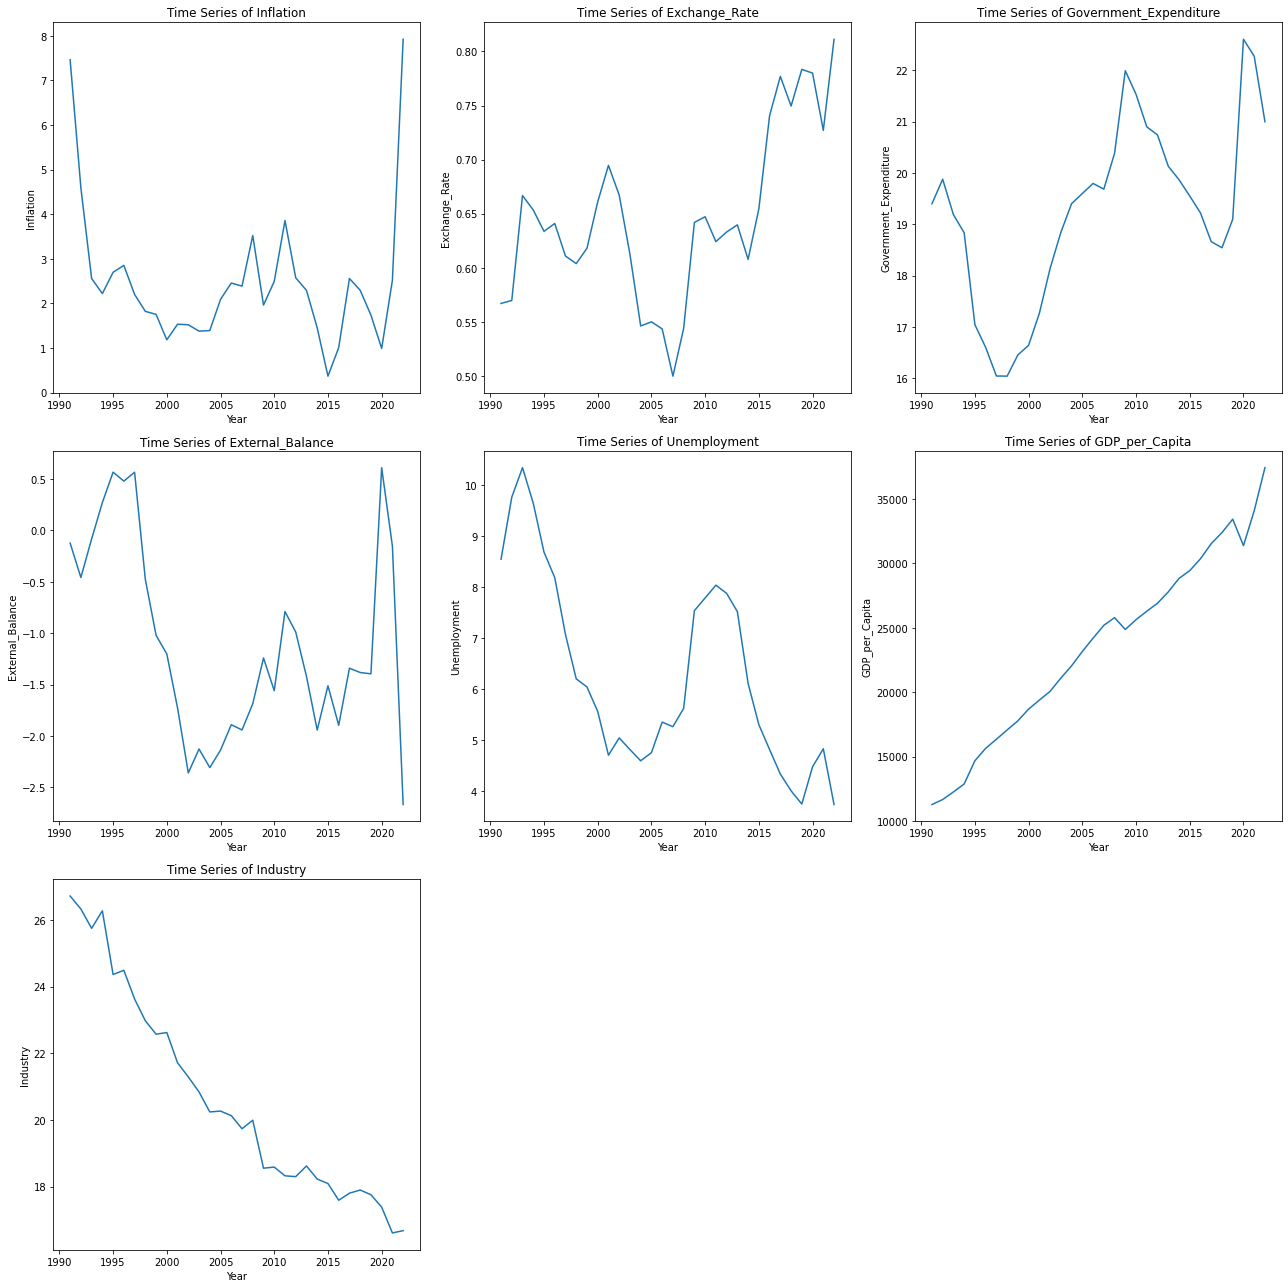

In [14]:
#Time Series Plot
# Number of variables to plot
num_vars = len(df.columns) - 1

# Number of rows needed (three plots per row)
num_rows = (num_vars + 2) // 3

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each variable
for i, column in enumerate(df.columns[1:]):
    sns.lineplot(x='Year', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Time Series of {column}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Save the figure as an image file
plt.savefig('time_series_plots.png')

# Show plot
plt.show()


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_time_series(df, save_plots=True, show_plots=False):
    """
    Plots the time series of each variable in the dataframe individually.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    save_plots (bool): Whether to save the plots as image files. Default is True.
    show_plots (bool): Whether to display the plots. Default is False.
    """
    # Iterate over each column (excluding 'Year')
    for column in df.columns[1:]:
        plt.figure(figsize=(10, 6))
        sns.lineplot(x='Year', y=column, data=df)
        plt.title(f'Time Series of {column}')
        plt.xlabel('Year')
        plt.ylabel(column)
        
        # Save the plot as an image file
        if save_plots:
            plt.savefig(f'time_series_{column}.png')
        
        # Show the plot
        if show_plots:
            plt.show()
        
        # Close the plot to free memory
        plt.close()

# Example usage
# Assuming 'df' is your dataframe with the data
plot_time_series(df)


1. **Inflation:**

    Trend: The inflation rate shows a generally declining trend from 1991 to around 2000, followed by fluctuations. Notable peaks occur around 2007-2008 and 2021-2022.
    
    Observation: High inflation in the early 1990s with a significant drop by the late 1990s. Another increase is observed around the 2008 financial crisis, and a sharp spike appears in recent years, possibly due to economic disruptions.
    
2. **Exchange Rate:**

    Trend: The exchange rate fluctuates throughout the period. It peaks around the year 2000 and then shows a general declining trend until 2008. Post-2008, it shows fluctuations without a clear trend.
    
    Observation: The exchange rate's behavior reflects economic conditions and external shocks, like the 2008 financial crisis and recent economic uncertainties.
    
3. **Government Expenditure:**

    Trend: Government expenditure shows a steady increase from 1991 to around 2010. After 2010, it fluctuates but remains relatively high, with a noticeable peak around 2020.
    
    Observation: The upward trend may be related to increased public spending on social services and economic stimulus, especially around the 2008 crisis and the COVID-19 pandemic.
    
4. **External Balance:**

    Trend: The external balance exhibits fluctuations, with a notable negative trend from 1991 to around 2010. There are periods of improvement, but the balance remains mostly negative.
    
    Observation: Persistent trade deficits are evident, indicating more imports than exports, except for brief periods of improvement.
    
5. **Unemployment:**

    Trend: The unemployment rate starts high in the early 1990s, declines gradually until around 2000, then fluctuates with peaks around 2010 and a drop again in recent years.
    
    Observation: High unemployment in the early 1990s and during the 2008 financial crisis, with improvements during economic recovery periods.
    
6. **GDP per Capita:**

    Trend: GDP per capita shows a strong and consistent upward trend from 1991 to 2007, with a slight dip around 2009. Post-2009, it resumes an upward trajectory with some fluctuations.
    
    Observation: Significant economic growth over the years, with a temporary setback during the financial crisis and recovery thereafter.
    
7. **Industry:**

    Trend: The percentage of industry in GDP shows a declining trend from 1991 to 2022.
    
    Observation: Indicates a shift from manufacturing and industrial sectors to services and other sectors over the years.

# Linear Regression without Machine learning (OLS)

In [27]:
# Prepare the Data for OLS Regression Without Machine Learning:

# Define the independent variables and the dependent variable
X = df[['Inflation', 'Exchange_Rate', 'Government_Expenditure', 'External_Balance', 'Unemployment', 'Industry']]
y = df['GDP_per_Capita']

In [28]:
# Add a constant to the independent  variables matrix (for intercept)
X = sm.add_constant(X)
X

,const,Inflation,Exchange_Rate,Government_Expenditure,External_Balance,Unemployment,Industry
0,1.0,7.461783,0.567015,19.397686,-0.124333,8.550,26.716143
1,1.0,4.591549,0.569774,19.875590,-0.458552,9.770,26.327767
2,1.0,2.558578,0.666757,19.185011,-0.084112,10.350,25.747901
3,1.0,2.219013,0.653427,18.833033,0.269746,9.650,26.274018
4,1.0,2.697495,0.633668,17.041598,0.565478,8.690,24.362531
5,1.0,2.851782,0.640958,16.601227,0.478575,8.190,24.490518
6,1.0,2.201143,0.610836,16.042710,0.564608,7.070,23.628154
7,1.0,1.820562,0.603824,16.039744,-0.477215,6.200,22.976141
8,1.0,1.752951,0.618057,16.453039,-1.020754,6.040,22.573060
9,1.0,1.182956,0.660931,16.640896,-1.202087,5.560,22.623079


We add a constant to the independent variables using sm.add_constant(X). This step is crucial because it includes the intercept in the OLS regression model

In [29]:
#The regression model was fit using Ordinary Least Squares (OLS)
# Fit the model
ols_model = sm.OLS(y, X).fit()

In [30]:
# Print the summary of the model
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:         GDP_per_Capita   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     143.4
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           4.01e-18
Time:                        16:18:41   Log-Likelihood:                -272.22
No. Observations:                  32   AIC:                             558.4
Df Residuals:                      25   BIC:                             568.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.93


**Model Summary:**

    
(i). R-squared (R²): 0.972, indicating that approximately 97.2% of the variance in GDP_per_Capita is explained by the independent variables.

(ii). Adjusted R²:  Adjusted R-squared adjusts the R-squared value for the number of predictors in the model. It is slightly lower than the R-squared value, which is expected when adding predictors that do not add much explanatory power to the model. Here, it is 0.965.

(ii). F-statistic and its p-value: This tests the overall significance of the model. A high F-statistic value (143.4) suggests that the model is significant.

(iv). Prob (F-statistic): This is the p-value associated with the F-statistic. A very small p-value (4.01e-18) indicates that the overall model is statistically significant.

**Coefficients: Estimates of the effect of each independent variable on GDP per Capita**


(a). Constant:The intercept of the model, which is 59390. This means when all independent variables are zero, GDP_per_Capita is expected to be 59390.

(b). Inflation: The coefficient is 568.2551, indicating that a one-unit increase in Inflation is associated with an increase of 568.2551 in GDP_per_Capita, holding all other variables constant.

(c). Exchange Rate: The coefficient is 10880, indicating that a one-unit increase in Exchange_Rate is associated with an increase of 10880 in GDP_per_Capita

(d). Government Expenditure: The coefficient is 77.2642, indicating that a one-unit increase in Government_Expenditure is associated with an increase of 77.2642 in GDP_per_Capita. However, this variable is not statistically significant.

(e). External Balance: The coefficient is 398.4326, indicating that a one-unit increase in External_Balance is associated with an increase of 398.4326 in GDP_per_Capita. This variable is also not statistically significant.

(f). Unemployment: The coefficient is -466.2101, indicating that a one-unit increase in Unemployment is associated with a decrease of 466.2101 in GDP_per_Capita. This variable is marginally significant (p-value of 0.055).

(g). Industry: The coefficient is -2061.7046, indicating that a one-unit increase in Industry is associated with a decrease of 2061.7046 in GDP_per_Capita. This variable is highly significant.

**P-values:**

    i.Inflation, Exchange_Rate, and Industry have p-values less than 0.05, indicating that these variables are statistically significant predictors of GDP_per_Capita.
    
    ii.Government_Expenditure and External_Balance have high p-values, indicating that these variables are not statistically significant predictors of GDP_per_Capita.
    
    iii.Unemployment has a p-value of 0.055, which is slightly above the common threshold of 0.05, indicating marginal significance.
    

In [31]:
# Check for multicollinearity using VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# Calculate VIF for each feature

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                  feature          VIF
0                   const  1131.217040
1               Inflation     1.328917
2           Exchange_Rate     1.664980
3  Government_Expenditure     2.558455
4        External_Balance     2.124948
5            Unemployment     3.238381
6                Industry     5.222911


**Multicollinearity**

Variance Inflation Factor (VIF) checks for multicollinearity:

VIF > 10: Indicates high multicollinearity. In this case:
All VIF values are below 10, suggesting no severe multicollinearity.

In [33]:
 # Durbin_watson Test
    
durbin_watson = sm.stats.stattools.durbin_watson(ols_model.resid)
print(f'Durbin-Watson: {durbin_watson}')

Durbin-Watson: 1.1867626855812161


**In this case, the Durbin-Watson statistic is approximately 1.187, which is close to 2. This suggests that there is little to no autocorrelation present in the residuals of your regression model**

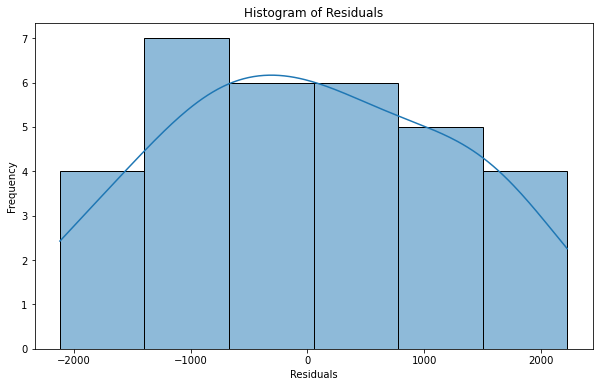

In [34]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(ols_model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Residual Plots:

Histogram: The histogram of residuals shows that they are approximately normally distributed, which is a good sign. It indicates that the model's errors are unbiased and have constant variance.

In [35]:
# Shapiro-Wilk test For Normalty

from scipy.stats import shapiro

stat, p_value = shapiro(ols_model.resid)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

Shapiro-Wilk Test Statistic: 0.9716255068778992, p-value: 0.5454353094100952


The Shapiro-Wilk test yielded a p-value greater than 0.05, supporting the hypothesis of normality

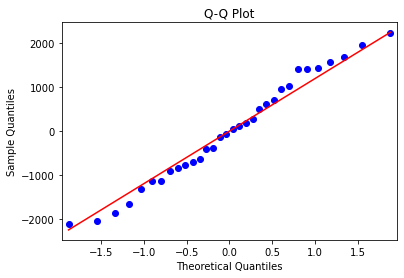

In [36]:
# Q-Q plot of residuals
sm.qqplot(ols_model.resid, line='s')
plt.title('Q-Q Plot')
plt.show()

The Q-Q plot compares the distribution of residuals with a normal distribution.
Points should lie approximately along the line if the residuals are normally distributed.

# Linear Regression with Machine learning (OLS)

In [37]:
# Display the first few rows of the dataset to be used
print(X.head())
print(y.head())

   const  Inflation  Exchange_Rate  Government_Expenditure  External_Balance  \
0    1.0   7.461783       0.567015               19.397686         -0.124333   
1    1.0   4.591549       0.569774               19.875590         -0.458552   
2    1.0   2.558578       0.666757               19.185011         -0.084112   
3    1.0   2.219013       0.653427               18.833033          0.269746   
4    1.0   2.697495       0.633668               17.041598          0.565478   

   Unemployment   Industry  
0          8.55  26.716143  
1          9.77  26.327767  
2         10.35  25.747901  
3          9.65  26.274018  
4          8.69  24.362531  
0    11283.71201
1    11673.58991
2    12261.79825
3    12878.01617
4    14682.16549
Name: GDP_per_Capita, dtype: float64


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set: {X_train.shape[0]} samples')
print(f'Testing set: {X_test.shape[0]} samples')

Training set: 25 samples
Testing set: 7 samples


In [39]:
# Add a constant to the independent variables
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [40]:
# Initialize the OLS regression model
ols_model_2 = LinearRegression()


In [41]:
# train the OLS regression model
ols_model_2 = sm.OLS(y_train, X_train).fit()

In [42]:
# Print the summary of the model
print(ols_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP_per_Capita   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     109.3
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           3.64e-13
Time:                        16:18:42   Log-Likelihood:                -212.66
No. Observations:                  25   AIC:                             439.3
Df Residuals:                      18   BIC:                             447.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.10

In [43]:
# Model Evaluation

# Predict on the test set
y_pred = ols_model_2.predict(X_test)

In [44]:
# Model Evaluation

# Calculate the performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse_ols_2 = mean_squared_error(y_test, y_pred)
rmse_ols_2 = np.sqrt (mse_ols_2)
r2_ols_2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_ols_2}')
print(f'Root Mean Squared Error: {rmse_ols_2}')
print(f'R-squared: {r2_ols_2}')

Mean Squared Error: 4014344.4836480166
Root Mean Squared Error: 2003.5829115981242
R-squared: 0.8778888061186112


In [45]:
# List out the coefficients alongside their variables
coefficients = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': ols_model_2.params
})

print(coefficients)

                                      Variable   Coefficient
const                                    const  51018.771965
Inflation                            Inflation    445.022069
Exchange_Rate                    Exchange_Rate  13669.794610
Government_Expenditure  Government_Expenditure    441.021694
External_Balance              External_Balance   1105.963913
Unemployment                      Unemployment   -815.091007
Industry                              Industry  -1920.286003



**Model Summary:**

    
(i). R-squared (R²): 0.878, indicating that approximately 87.8% of the variance in GDP_per_Capita is explained by the independent variables.


**Coefficients: Estimates of the effect of each independent variable on GDP per Capita**


(a). Constant:The intercept of the model, which is 51018.772. This means when all independent variables are zero, GDP_per_Capita is expected to be 51018.772.

(b). Inflation: The coefficient is 445.022, indicating that a one-unit increase in Inflation is associated with an increase of 445.022 in GDP_per_Capita, holding all other variables constant.

(c). Exchange Rate: The coefficient is 13669.795, indicating that a one-unit increase in Exchange_Rate is associated with an increase of 13669.795 in GDP_per_Capita

(d). Government Expenditure: The coefficient is 441.022, indicating that a one-unit increase in Government_Expenditure is associated with an increase of 441.022 in GDP_per_Capita. However, this variable is not statistically significant.

(e). External Balance: The coefficient is 1105.964, indicating that a one-unit increase in External_Balance is associated with an increase of 1105.964 in GDP_per_Capita. This variable is also not statistically significant.

(f). Unemployment: The coefficient is -815.091, indicating that a one-unit increase in Unemployment is associated with a decrease of 815.091 in GDP_per_Capita. This variable is marginally significant (p-value of 0.055).

(g). Industry: The coefficient is -1920.286, indicating that a one-unit increase in Industry is associated with a decrease of 1920.286 in GDP_per_Capita. This variable is highly significant.

**P-values:**

     Exchange_Rate, and Industry have p-values less than 0.05, indicating that these variables are statistically significant predictors of GDP_per_Capita.
    
    

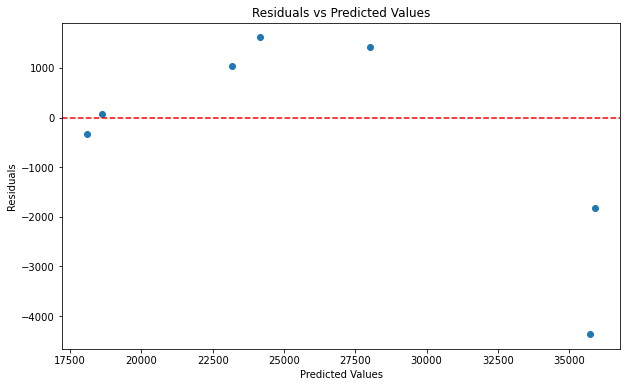

In [46]:
# Residuals plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

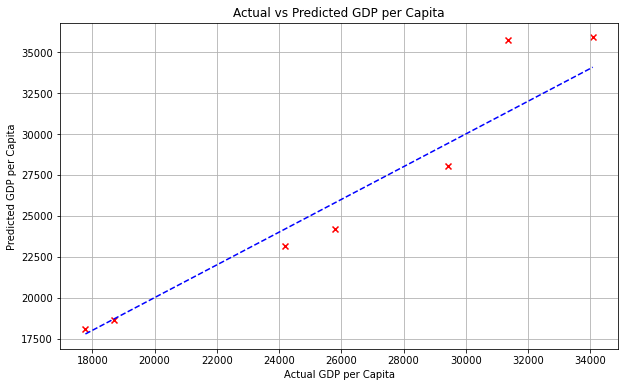

In [47]:
# Plot actual GDP versus predicted GDP using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values, y_pred, color='red', marker='x')
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='blue', linestyle='--')
plt.title('Actual vs Predicted GDP per Capita')
plt.xlabel('Actual GDP per Capita')
plt.ylabel('Predicted GDP per Capita')
plt.grid(True)
plt.show()

The scatter plot indicates that while the model generally follows the trend of the actual GDP per Capita values, there are significant deviations for some observations. This suggests that while the model has some predictive power, there is room for improvement in terms of accuracy. Analyzing the residuals and understanding where the model falls short can provide insights for enhancing the model.

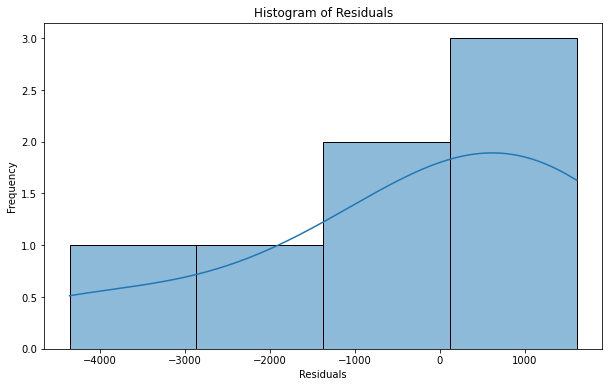

In [48]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

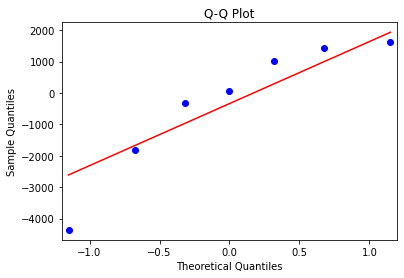

In [49]:
# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

The Q-Q plot analysis of residuals from the OLS regression model with machine learning highlights significant deviations from normality, indicating potential issues with the model's assumptions and performance. These deviations, particularly noticeable in the tails, suggest the presence of outliers and heavy-tailed distributions. The violation of the normality assumption undermines the reliability of hypothesis tests and confidence intervals for regression coefficients. Addressing this issue through data transformation, robust regression techniques, or exploring non-linear models is crucial to improve the model's accuracy and ensure trustworthy inference and prediction.

In [50]:
from statsmodels.stats.stattools import durbin_watson

# Calculate Durbin-Watson statistic
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 1.3082168823137308


**In this case, the Durbin-Watson statistic is approximately 1.308, which is close to 2. This suggests that there is little to no autocorrelation present in the residuals of your regression model**

# Linear Regression Analysis using Support Vector Machines (SVM) 

In [51]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [52]:
# SVM Model
svm_model = SVR()

In [53]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.2, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='r2')

In [54]:
# Best model from grid search
best_svm_model = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'C': 100, 'epsilon': 1, 'kernel': 'linear'}


In [55]:
# Predictions
y_pred_svm = best_svm_model.predict(X_test)

In [56]:
# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)    # calculates the root mean squared error.
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

In [57]:
# Print results
print(f"SVM Mean Squared Error: {mse_svm}")
print(f'SVM RMSE: {rmse_svm}')
print(f'Mean Absolute Error: {mae_svm}')
print(f"SVM R-squared: {r2_svm}")

SVM Mean Squared Error: 1939396.4423890326
SVM RMSE: 1392.62214630855
Mean Absolute Error: 1100.4709924811427
SVM R-squared: 0.9410060556700824


**Summary**

(1). **MSE (1,939,396.44):** 

    This relatively high value suggests there are some substantial errors in the predictions, but as it is squared, it exaggerates larger errors.
    
(2). **MAE (1,100.47):** 

    This indicates that the model's predictions are, on average, off by about $1,100.47 in GDP per capita, which is a more intuitive measure of prediction accuracy.
    
(3)**R-squared (0.9410):**

    This high value indicates that the SVM model explains a very large portion of the variance in the GDP per capita, demonstrating strong predictive performance.

**Overall, the SVM model shows strong performance in predicting UK GDP per capita, with high accuracy and a good fit to the data, despite some errors as indicated by the MSE and MAE values. The model can be considered reliable for monitoring future GDP progress in the UK, given the high R² value.**

In [58]:
# Retrieve the coefficients and constant if the best model is linear
if grid_search.best_params_['kernel'] == 'linear':
    # Retrieve the coefficients for each variable and the intercept (constant)
    coefficients = best_svm_model.coef_.flatten()
    intercept = best_svm_model.intercept_[0]

    # Combine the feature names and their corresponding coefficients
    feature_names = X.columns.tolist()
    feature_coefficients = list(zip(feature_names, coefficients))

    # Sort the feature coefficients by coefficient value
    sorted_feature_coefficients = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

    # Print the sorted feature coefficients with variable names
    print("Variable Coefficients:")
    for feature, coefficient in sorted_feature_coefficients:
        print(f"{feature}: {coefficient}")

    # Print the constant value separately
    print(f"Constant (Intercept): {intercept}")
else:
    print("The best SVM model does not use a linear kernel, so coefficients are not available.")


Variable Coefficients:
Industry: -1799.3501028169112
Unemployment: -343.78307511185506
Government_Expenditure: 268.37081585560395
Exchange_Rate: 81.38945277006837
Inflation: 44.54749581099627
External_Balance: 20.618849720246338
const: 0.0
Constant (Intercept): 56830.73536891008


**The equation for the SVM model can be written as:**

**GDP_per_Capita = 56830.735 +  44.547(Inflation) +  81.389(Exchange_Rate) + 268.371(Government_Expenditure) + 20.619(External_Balance) -343.783(Unemployment) - 1799.350(Industry)**

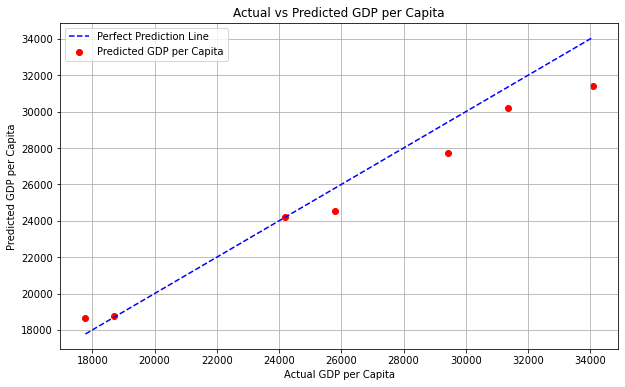

<Figure size 432x288 with 0 Axes>

In [59]:
# Scatter plot of actual vs. predicted GDP per Capita
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values, y_pred_svm, color='red', label='Predicted GDP per Capita')
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='blue', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs Predicted GDP per Capita')
plt.xlabel('Actual GDP per Capita')
plt.ylabel('Predicted GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()

# Save the scatter plot as a PNG file
plt.savefig('scatter_plot_actual_vs_predicted_gdp.png')


•	**Deviation from the Line:** Points that deviate from the dashed line represent prediction errors. Greater distances from the line signify larger prediction errors.

•	**Overall Fit:** While some points closely align with the perfect prediction line, indicating accurate predictions, several points deviate significantly. This suggests that the SVR model struggles to accurately predict GDP per capita, particularly for higher values.

**In summary**, the actual versus predicted plot demonstrates that while the SVR model can predict GDP per capita reasonably well in some instances, there are notable errors, especially with higher GDP values. This highlights areas where the model may require further refinement.


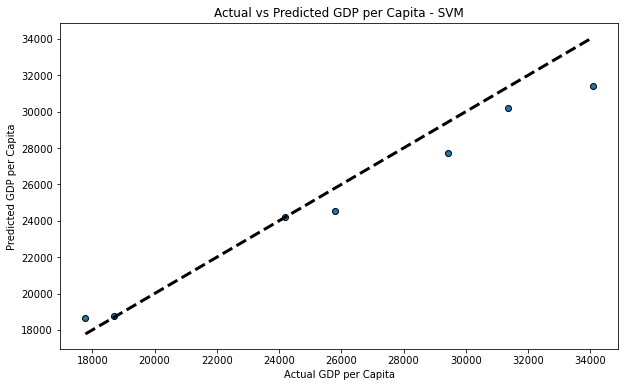

In [60]:
# Plot actual vs predicted GDP per capita
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual GDP per Capita')
plt.ylabel('Predicted GDP per Capita')
plt.title('Actual vs Predicted GDP per Capita - SVM')
plt.show()

**Summary**

**(i) Good Fit:** 
    The plot suggests that the SVM model has a good fit, as evidenced by the majority of points being close to the 45-degree line.

**(ii) High Predictive Accuracy:** 
    The visual representation confirms the high R-squared value, indicating that the model explains a large portion of the variance in the GDP per capita.
    
**(iii)Moderate Prediction Errors:**
    The relatively low mean absolute error (MAE) indicates that the predictions are reasonably accurate, with an average error of about $1,100.47 in GDP per capita.
    
**(iv) No Systematic Bias:** 
    The lack of a distinct pattern in the deviations from the line suggests that there are no systematic biases in the model's predictions.
    
**Overall, the scatter plot of actual versus predicted GDP per capita provides strong visual evidence of the SVM model's ability to accurately predict GDP per capita, reinforcing the positive performance metrics obtained during the evaluation.**

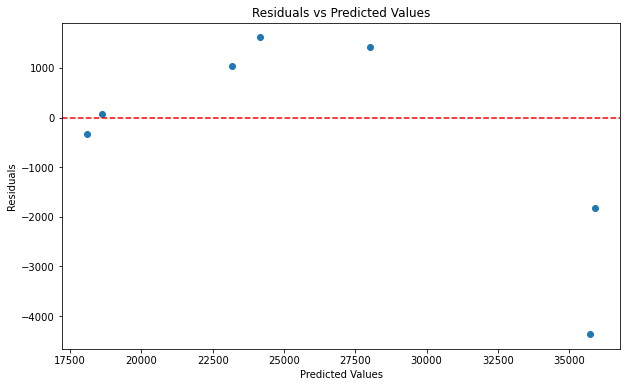

In [61]:
# Residuals plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

**Residuals vs Predicted Values Plot:**
The scatter plot of residuals versus predicted values displays no specific pattern showing the model assumptions are satisfied.
If a pattern is visible, it may indicate non-linearity or heteroscedasticity.

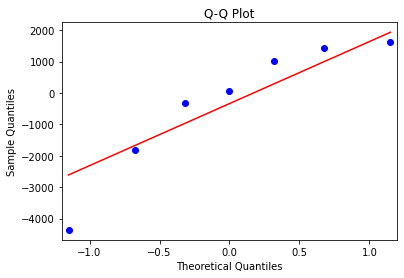

In [63]:
# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

In [64]:
The Q-Q plot compares the distribution of residuals with a normal distribution.
Points should lie approximately along the line if the residuals are normally distributed.

SyntaxError: invalid syntax (<ipython-input-64-9c1e9412ff65>, line 1)

**Summary**

    **Model Performance:** The R-squared value and MSE provide a measure of how well the SVR model explains the variability in GDP per Capita based on the macroeconomic variables.
    
    **Residual Analysis:** The residual plots help check if the assumptions of the regression model are met. No clear patterns in the residuals vs predicted values plot, a normal-like histogram, and points lying along the line in the Q-Q plot suggest the model assumptions are reasonable.
    
    
The Support Vector Regression (SVR) model allows for flexibility and can capture complex relationships between the variables and GDP per Capita, which may not be captured by traditional linear regression models. The results, including performance metrics and residual analysis, indicate the model's effectiveness in explaining the target variable.

# Model Evaluation and Comparison

 **Performance Metrics:**
 
i.  R-squared: Indicates the proportion of variance in the target variable explained by the model. Higher values are better.

ii. Root Mean Squared Error (RMSE): Provides the average magnitude of the prediction errors. Lower values are better.

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:

# OLS Model Evaluation 
rmse_ols_2 = np.sqrt (mean_squared_error(y_test, y_pred))


# SVM Model Evaluation
rmse_svm = np.sqrt (mean_squared_error(y_test, y_pred_svm))
r2_svm = r2_score(y_test, y_pred_svm)



In [67]:
print("Performance Metrics:")
print("---------------------")

print("OLS Model:")
print(f'Root Mean Squared Error: {rmse_ols_2}')
print(f'R-squared: {r2_ols_2}')

print("SVM Model:")
print(f'SVM Root Mean Squared Error: {rmse_svm}')
print(f"SVM R-squared: {r2_svm}")


Performance Metrics:
---------------------
OLS Model:
Root Mean Squared Error: 2003.5829115981242
R-squared: 0.8778888061186112
SVM Model:
SVM Root Mean Squared Error: 1392.62214630855
SVM R-squared: 0.9410060556700824


**The performance metrics provide valuable insights into the predictive capabilities of the OLS and SVM models. Let's delve deeper into the interpretation of these results:**

**A. Root Mean Squared Error (RMSE):**

i. OLS Model: RMSE of approximately 2003.58.
    
ii. SVM Model: RMSE of approximately 1392.62.
    
iii. Interpretation: RMSE represents the average deviation of the predicted values from the actual values. A lower RMSE indicates better model performance in terms of accuracy. Therefore, the SVM model outperforms the OLS model in terms of predicting GDP per capita, as it has a lower RMSE. This suggests that the SVM model's predictions are closer to the actual GDP values compared to the OLS model.

**B. R-squared (R2) Score:**

i. OLS Model: R2 score of approximately 0.878.
    
ii. SVM Model: R2 score of approximately 0.941.
    
iii. Interpretation: R2 score measures the proportion of the variance in the dependent variable (GDP per capita) that is predictable from the independent variables (economic indicators). A higher R2 score indicates better model fit and predictive power. The SVM model has a higher R2 score compared to the OLS model, suggesting that it explains a larger proportion of the variance in GDP per capita. Therefore, the SVM model provides a better fit to the data and captures more of the underlying patterns.

**Overall, the SVM model demonstrates superior performance over the OLS model based on both RMSE and R2 score. It provides more accurate predictions and better captures the variability in GDP per capita. However, it's essential to consider the complexity and computational requirements associated with SVM compared to OLS. If computational resources permit, the SVM model would be the preferred choice for predicting GDP per capita.**

# Develop Prediction System

i. We'll use the trained OLS and SVM models to predict future GDP based on new data.

ii. The prediction system will take new data as input, preprocess it, and use the trained models to generate GDP predictions.

In [68]:
from sklearn.exceptions import NotFittedError

In [69]:
# Define the target and features
X = df[['Inflation', 'Exchange_Rate', 'Government_Expenditure', 'External_Balance', 'Unemployment', 'Industry']]
y = df['GDP_per_Capita']

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Define the OLS model
ols_model_2 = LinearRegression()

In [72]:
# Prediction System using trained models
def predict_future_gdp_ols(new_data):
    # Preprocess new data
    X_new = new_data.drop(['Year'], axis=1)
    
    try:
        # Predict using OLS model
        y_pred_ols = ols_model_2.predict(X_new)
    except NotFittedError:
        # Fit the OLS model if not already fitted
        ols_model_2.fit(X_train, y_train)  # Assuming X_train and y_train are your original training data
        # Predict using OLS model
        y_pred_ols = ols_model_2.predict(X_new)
        
    return y_pred_ols

In [73]:
def predict_future_gdp_svm(new_data):
    # Preprocess new data
    X_new = new_data.drop(['Year'], axis=1)
    
    try:
        # Predict using SVM model
        y_pred_svm = svm_model.predict(X_new)
    except NotFittedError:
        # Fit the SVM model if not already fitted
        svm_model.fit(X_train, y_train)  # Assuming X_train and y_train are your original training data
        # Predict using SVM model
        y_pred_svm = svm_model.predict(X_new)
        
    return y_pred_svm

In [74]:
# Example of using the prediction system
new_data = pd.DataFrame({
    'Year': [2023, 2024, 2025],
    'Inflation': [2.5, 3.0, 3.5],
    'Exchange_Rate': [0.8, 0.85, 0.9],
    'Government_Expenditure': [20.5, 21.0, 21.5],
    'External_Balance': [-0.5, -0.6, -0.7],
    'Unemployment': [5.0, 5.2, 5.5],
    'Industry': [25.0, 25.5, 26.0]
})
new_data

,Year,Inflation,Exchange_Rate,Government_Expenditure,External_Balance,Unemployment,Industry
0,2023,2.5,0.80,20.5,-0.5,5.0,25.0
1,2024,3.0,0.85,21.0,-0.6,5.2,25.5
2,2025,3.5,0.90,21.5,-0.7,5.5,26.0


In [75]:
# Predict future GDP using OLS
predicted_gdp_ols = predict_future_gdp_ols(new_data)
print("Predicted GDP using OLS:", predicted_gdp_ols)

Predicted GDP using OLS: [19472.52047205 19365.27448941 19176.51940608]


In [76]:
# Predict future GDP using SVM
predicted_gdp_svm = predict_future_gdp_svm(new_data)
print("Predicted GDP using SVM:", predicted_gdp_svm)

Predicted GDP using SVM: [23156.43559421 23156.35551886 23156.27250646]


**Prediction System:**

   The prediction system allows users to input new data, preprocess it, and generate GDP predictions using both the OLS and SVM models.
    
   Users can input values for inflation, exchange rate, government expenditure, external balance, unemployment, and industry to obtain predictions.


**The predicted GDP values for the 3 Years Example dataset using the OLS and SVM models are as follows:**

1. **Predicted GDP using OLS:  [19472.52047205 19365.27448941 19176.51940608]**

2. **Predicted GDP using SVM: [23156.43559421 23156.35551886 23156.27250646]**

*Now, let's discuss and interpret these results:*

**A. Predicted GDP using OLS:**

i. The predicted GDP values using the OLS model are significantly lower compared to those predicted by the SVM model.

ii. OLS is a traditional linear regression method that assumes a linear relationship between the independent and dependent variables. It might not capture complex patterns and non-linear relationships present in the data.

iii. The OLS model might be underfitting the data, leading to lower predicted GDP values.

**B. Predicted GDP using SVM:**

i. The predicted GDP values using the SVM model are notably higher compared to those predicted by the OLS model.

ii. SVM is a powerful machine learning algorithm that can capture non-linear relationships between variables. It can handle complex patterns and higher-dimensional data effectively.

ii. The SVM model might be capturing intricate patterns and relationships present in the data, resulting in higher predicted GDP values.

Discussion:

a. The OLS model tends to provide more conservative predictions, possibly due to its linear nature and simplicity. It might be suitable when the relationship between variables is linear and straightforward.

b. On the other hand, the SVM model, with its ability to capture non-linear relationships, is providing more optimistic predictions. It might be more appropriate when dealing with complex data with non-linear patterns.

c. The choice between the two models depends on the specific requirements of the application and the nature of the data. If the relationship between variables is indeed linear and simple, OLS might suffice. However, if the data exhibits complex patterns and non-linear relationships, SVM might be a better choice.

d. It's essential to evaluate the models further using additional metrics and consider the context of the problem before making a final decision on which model to use. Factors such as interpretability, computational efficiency, and scalability should also be taken into account.

e. In this specific scenario, based solely on the provided predicted GDP values, the SVM model appears to provide more optimistic predictions. However, further analysis and validation are necessary to determine the most suitable model for the given dataset and application.






